<h1><center>  Анализ результатов A/B-теста
</center></h1>

# Содержание
1. [Введение](#introduction)
2. [Шаг 1. Загрузите данные и подготовьте их к анализу](#paragraph1)
    1. [Вывод](#paragraph1.1)
3. [Шаг 2. Приоритизация гипотез](#paragraph2)
    1. [Вывод](#paragraph2.1)
3. [Шаг 3. Анализ A/B-теста](#paragraph3) 
    1. [Кумулятивная выручка по группам](#paragraph3.1)
    2. [Кумулятивный средний чек по группам](#paragraph3.2)
    3. [Относительное изменение кумулятивного среднего чека группы B к группе A](#paragraph3.3)
    4. [Кумулятивная конверсия по группам](#paragraph3.4)
    5. [Относительное изменение кумулятивной конверсии группы B к группе A](#paragraph3.5)
    6. [Количество заказов по пользователям](#paragraph3.6)
    7. [Cтоимости заказов](#paragraph3.7)
4. [Cтатистическая значимость различий  между группами по «сырым» данным](#paragraph4)  
   1. [Cтатистическая значимость различий в конверсии](#paragraph4.1)
   2. [Cтатистическая значимость различий в среднем чеке заказа](#paragraph4.2)
5. [Cтатистическая значимость различий  между группами по «очищенным » данным](#paragraph5)
   1. [Cтатистическая значимость различий в конверсии](#paragraph5.1)
   2. [Cтатистическая значимость различий в среднем чеке заказа](#paragraph5.2)
6. [Общий вывод](#paragraph6)   

## Введение<a name="introduction"></a>
***Цель работы:***
Приоритизировать имеющиеся гипотезы, запустить A/B-тест и проанализировать результаты.


Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.


В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
В файлах /datasets/orders.csv и /datasets/visitors.csv описаны результаты проведенного A/B-теста.



Необходимо:
* Применить фреймворк ICE и RICE для приоритизации гипотез, объяснить отличия
* Посчитать и визуализировать следующие метрики (кумулятивная выручка, кумулятивный средний чек, кумулятивная конверсия, а также относительное изменение кумулятивного среднего чека и кумулятивной конверсии группы B к группе A) 

* Посчитать статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным и по «очищенным» данным

* На основе анализа принять решение по результатам теста 







# Шаг 1. Загрузите данные и подготовьте их к анализу <a name="paragraph1"></a>

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import math 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# прочитаем файлы
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv') 

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
# Отобразим содержание ячеек полностью
pd.options.display.max_colwidth=150
# приведем заголовки столбцов к нижн. регистру
hypothesis.columns = hypothesis.columns.str.lower()

hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Шкала оценок, судя по всему: от 1 до 10

In [5]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [6]:
# Посмотрим общ. инф-ю
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


1. Пропусков нет
2. Нужно изменить тип данных столбца date
3. Тип данных других столбцов менять - не вижу смысла 

In [7]:
# Изменим тип данных
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [8]:
# Проверим наличие полных дубликатов
orders.duplicated().value_counts()

False    1197
dtype: int64

Дубликатов нет

In [9]:
# Посмотрим описат. статистику
orders.describe(include='all')

,transactionId,visitorId,date,revenue,group
count,1.197000e+03,1.197000e+03,1197,1.197000e+03,1197
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05 00:00:00,NaN,B
freq,NaN,NaN,48,NaN,640
first,NaN,NaN,2019-08-01 00:00:00,NaN,NaN
last,NaN,NaN,2019-08-31 00:00:00,NaN,NaN
mean,2.155621e+09,2.165960e+09,NaN,8.348006e+03,NaN
std,1.229085e+09,1.236014e+09,NaN,3.919113e+04,NaN
min,1.062393e+06,5.114589e+06,NaN,5.000000e+01,NaN
25%,1.166776e+09,1.111826e+09,NaN,1.220000e+03,NaN


1. Столбец revenue: min > 0, ошибок со знаком нет; медиана примерно в 2,5 раза меньше среднего - распределение имеет правостороннюю асимметрию
2. Мы располагаем данными с  01-08-2019 по 31-08-2019, т.е. за весь август 2019 г.

In [10]:
print('Кол-во уникальных покупателей :', orders.visitorId.nunique())

Кол-во уникальных покупателей : 1031


С учетом того, что всего строк 1197 - можно сделать предварительный вывод, что большинство покупателей сделали 1 заказ

In [11]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [12]:
# Посмотрим как распределены покупатели по группам
orders.pivot_table(index='group',values='visitorId', aggfunc='nunique')

,group,visitorId
group,,
A,1,503
B,1,586


In [13]:
orders.pivot_table(index='group',values='visitorId', aggfunc='nunique').visitorId.sum()

1089

Т.е. у нас есть покупатели, которые зачислены как в группу "А", так и в "В", выявим их

In [14]:
# Список уник. id группы А
group_A = orders.query('group == "A"')['visitorId'].unique()
# Список уник. id группы B
group_B = orders.query('group == "B"')['visitorId'].unique()
# Возьмем те id, которые есть в обоих списках
visitorsAB = orders.query('(visitorId in @group_A and visitorId in @group_B)')
#Отсортируем по id и выведем рез-т
visitorsAB .sort_values(by='visitorId')

,transactionId,visitorId,date,revenue,group
703,4293855558,8300375,2019-08-07,1790,A
71,3679129301,8300375,2019-08-01,10510,B
823,2971973105,199603092,2019-08-27,2790,A
246,437656952,199603092,2019-08-02,3488,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
187,2048878902,4256040402,2019-08-17,1550,A
114,1120327437,4256040402,2019-08-01,5800,A
60,1421016313,4256040402,2019-08-16,56650,B
662,1811671147,4266935830,2019-08-29,78990,A


In [15]:
orders = orders.query('~(visitorId in @group_A and visitorId in @group_B)')
# Проверка, что "двойных" пользователей не осталось
orders.pivot_table(index='group',values='visitorId', aggfunc='nunique').visitorId.sum() - orders.visitorId.nunique()

0

In [16]:
# Еще раз посмотрим опис. статистику
orders.describe(include='all')

,transactionId,visitorId,date,revenue,group
count,1.016000e+03,1.016000e+03,1016,1.016000e+03,1016
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05 00:00:00,NaN,B
freq,NaN,NaN,43,NaN,548
first,NaN,NaN,2019-08-01 00:00:00,NaN,NaN
last,NaN,NaN,2019-08-31 00:00:00,NaN,NaN
mean,2.155085e+09,2.128677e+09,NaN,8.300815e+03,NaN
std,1.234372e+09,1.221578e+09,NaN,4.212199e+04,NaN
min,1.062393e+06,5.114589e+06,NaN,5.000000e+01,NaN
25%,1.143481e+09,1.043655e+09,NaN,1.190000e+03,NaN


Статистика практически не изменилась

In [17]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [18]:
# Посмотрим общ. инф-ю
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


1. Пропусков нет
2. Нужно изменить тип данных столбца date
3. Всего в тестировалось 62 пользователя

In [19]:
# Изменим тип данных
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [20]:
# Проверим наличие полных дубликатов
visitors.duplicated().value_counts()

False    62
dtype: int64

Дубликатов нет

In [21]:
# Посмотрим описат. ст-ку
visitors.describe(include='all')

,date,group,visitors
count,62,62,62.000000
unique,31,2,NaN
top,2019-08-02 00:00:00,B,NaN
freq,2,31,NaN
first,2019-08-01 00:00:00,NaN,NaN
last,2019-08-31 00:00:00,NaN,NaN
mean,NaN,NaN,607.290323
std,NaN,NaN,114.400560
min,NaN,NaN,361.000000
25%,NaN,NaN,534.000000


1. Данные за тот же период, что orders
2. Медиана и среднее значения столбца visitors отличаются относительно "несильно", предварительно можно предположить, что распределение может быть близко к нормальному

In [22]:
# Сгруппируем тех польз-й, которые были в обеих группах, посчитаем их число на каждую дату по каждой группе
visitorsAB_amount= visitorsAB.groupby(['date', 'group']).agg({'group': 'count'})
visitorsAB_amount.columns = ['n_buyers']
visitorsAB_amount = visitorsAB_amount.reset_index()

visitorsAB_amount.shape

(56, 3)

In [23]:
# объеденим таблицу с visitors
visitors_and_ABvisitors = visitorsAB_amount.merge(visitors, how='right',on=['date', 'group'])

In [24]:
# Дат с покупками "двойных" покупателей 56, а в visitors - 62, соответ-но заполним пропуски нулями и проверим
visitors_and_ABvisitors = visitors_and_ABvisitors.fillna(0)
visitors_and_ABvisitors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 4 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
n_buyers    62 non-null float64
visitors    62 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.4+ KB


In [25]:
# Добавим столбец с коррет-ми значениями
visitors_and_ABvisitors['n_visitors'] = visitors_and_ABvisitors['visitors'] - visitors_and_ABvisitors['n_buyers']

visitors_and_ABvisitors

,date,group,n_buyers,visitors,n_visitors
0,2019-08-01,A,1.0,719,718.0
1,2019-08-01,B,4.0,713,709.0
2,2019-08-02,A,1.0,619,618.0
3,2019-08-02,B,1.0,581,580.0
4,2019-08-03,B,2.0,509,507.0
...,...,...,...,...,...
57,2019-08-13,A,0.0,748,748.0
58,2019-08-16,A,0.0,361,361.0
59,2019-08-26,A,0.0,722,722.0
60,2019-08-19,B,0.0,487,487.0


In [26]:
visitors_and_ABvisitors = visitors_and_ABvisitors.sort_values(by=['group','date']).reset_index()
# Обновим столбец visitors
visitors['visitors'] = visitors_and_ABvisitors['n_visitors']
visitors

,date,group,visitors
0,2019-08-01,A,718.0
1,2019-08-02,A,618.0
2,2019-08-03,A,507.0
3,2019-08-04,A,712.0
4,2019-08-05,A,753.0
...,...,...,...
57,2019-08-27,B,715.0
58,2019-08-28,B,648.0
59,2019-08-29,B,526.0
60,2019-08-30,B,487.0


In [27]:
visitors['visitors'].describe()

count     62.000000
mean     604.370968
std      113.910841
min      361.000000
25%      529.250000
50%      621.000000
75%      707.500000
max      768.000000
Name: visitors, dtype: float64

Распределение почти не изменилось

In [28]:
# Приведем тип к целочисленному
visitors['visitors'] = visitors['visitors'].astype('int')

## Вывод  <a name="paragraph1.1"></a>
1.	В таблице заказов, выявлены покупатели, которые зачислены в обе группы
2.	Я предположил, что это связано с теми или иными ошибками при проведение А/B теста, и исключил этих пользователей из выборок
3.	Значения таблицы посещений были скорректированы на посещения этих пользователей, соответственно


## Шаг 2. Приоритизация гипотез<a name="paragraph2"></a>

In [29]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### ICE SCORE
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [30]:
# Посчитаем ICE SCORE
hypothesis['ice'] = (hypothesis.impact * hypothesis.confidence) / hypothesis.efforts
# Выведем на экран гипотезы по убыванию приоритета
hypothesis.sort_values(by='ice', ascending=False)[['hypothesis', 'ice']]

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Первые три гипотезы по ICE: (8,0,7)
* 8 - имеет высокий impact и confidence (9 и 9 соответственно), т.е. изменение должно иметь высокое влияние на пользователей и мы имеем достаточно высокий уровень уверенности в этом (и в др. оценках)
* 0 - имеет высокий impact (10)
* 7 - имеет относительно низкий efforts, т.е. гипотезу относительно несложно проверить (есть и более "простые" для проверки гипотезы, но они уступают по др. оценкам)

### RICE SCORE
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [31]:
# Посчитаем RICE SCORE
hypothesis['rice'] = (hypothesis.reach * hypothesis.impact * hypothesis.confidence) / hypothesis.efforts
# Выведем на экран гипотезы по убыванию приоритета 
hypothesis.sort_values(by='rice', ascending=False)[['hypothesis', 'rice']]

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Первые три гипотезы по RICE: (7,2,0)

Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло

In [32]:
# Отсортируем и сохраним  в переменной гипотезы отсортированные по убыванию ice
hypothesis1 = hypothesis.sort_values(by='ice',ascending=False).reset_index()
# Переименнуем толбцы
hypothesis1.columns = ['ordinal_number', 'hypothesis', 'reach', 'impact', 'confidence', 'efforts',
       'ice', 'rice']

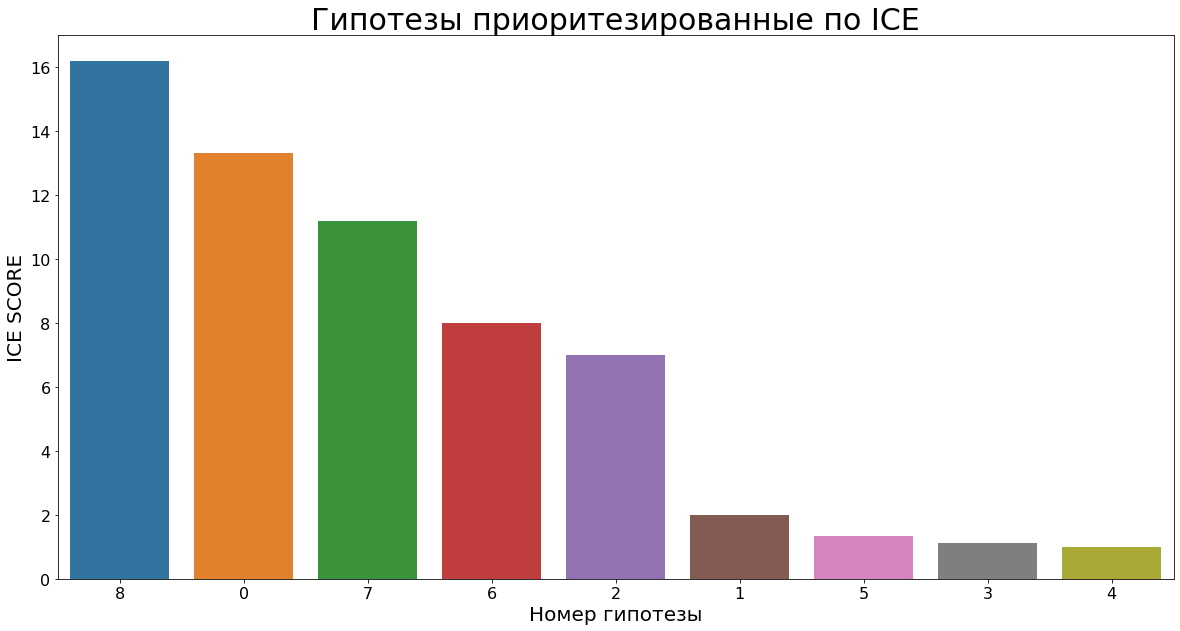

In [33]:
# Построим график 
plt.figure(figsize =(20,10))
sns.barplot(x=hypothesis1.ordinal_number, y=hypothesis1.ice, order=hypothesis1.ordinal_number)
plt.tick_params(axis='both', which='major', labelsize=16),
plt.title('Гипотезы приоритезированные по ICE', fontsize=30),
plt.xlabel('Номер гипотезы', fontsize=20),
plt.ylabel('ICE SCORE', fontsize=20)
plt.show()

In [34]:
# Отсортируем и сохраним в переменной гипотезы отсортированные по убыванию rice
hypothesis2 = hypothesis.sort_values(by='rice',ascending=False).reset_index()
# Переименнуем толбцы
hypothesis2.columns = ['ordinal_number', 'hypothesis', 'reach', 'impact', 'confidence', 'efforts',
       'ice', 'rice']

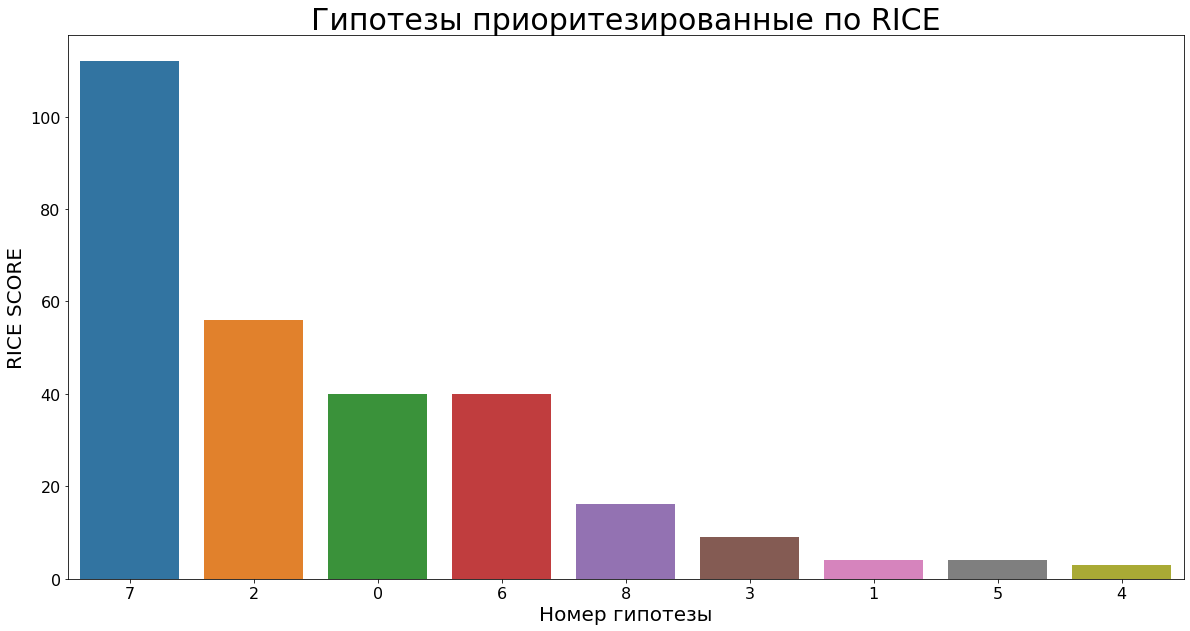

In [35]:
# Построим график 
plt.figure(figsize =(20,10))
sns.barplot(x=hypothesis2.ordinal_number, y=hypothesis2.rice, order=hypothesis2.ordinal_number)
plt.tick_params(axis='both', which='major', labelsize=16),
plt.title('Гипотезы приоритезированные по RICE', fontsize=30),
plt.xlabel('Номер гипотезы', fontsize=20),
plt.ylabel('RICE SCORE', fontsize=20)
plt.show()

## Вывод  <a name="paragraph2.1"></a>
1. Наиболее приоритетные гипотезы по ICE: (8,0,7)
2. Наиболее приоритетные гипотезы по RICE: (7,2,0)
3. Приоритизация гипотез при применении RICE вместо ICE изменилась, потому что:
* Гипотеза 7 - имеет высокую оценку reach, т.е. широкий охват пользователей (10), при этом имеет относительно низкий efforts, т.е. гипотезу относительно несложно проверить, что делает эту гипотезу наиболее приоритетной
* Гипотеза 2 - также имеет высокий охват, и еще более низкую оценку efforts, чем у гипотезы 7, что дает ей возможность занять второе место по приоритету (хотя в тройку по ICE эта гипотеза не вошла)
* Гипотеза 0 - хотя и имеет низкий охват(3), но другие оценки (impact и confidence) достаточны высоки, чтобы эта гипотеза заняла 3 место
* Гипотеза 8 - хотя по ICE стоит на первом месте, имеет охват (1), что не позволило ей войти в первую тройку 

## Шаг 3. Анализ A/B-теста  <a name="paragraph3"></a>

Для удобства дальнейшей работы напишем функцию, которая «оформляет» графики

In [36]:
def graphic(name, x, y, legend=0):
    # Сохраняем параметры в переменной
    parameters = (
        plt.tick_params(axis='both', which='major', labelsize=16),
        plt.title(name, fontsize=30),
        plt.xlabel(x, fontsize=20),
        plt.ylabel(y, fontsize=20)
    )

    # Выполнение кода по условию
    if legend == 0:
        return (
            parameters,
            plt.show()
        )

    return (
        parameters,
        plt.legend(fontsize=14),
        plt.show()
    )

## Кумулятивная выручка по группам<a name="paragraph3.1"></a>
Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения

In [37]:
# Создадим массив уникал. пар дата - группа
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head(10)

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
66,2019-08-01,B
86,2019-08-22,A
87,2019-08-22,B
124,2019-08-17,A
125,2019-08-17,B


In [38]:
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [39]:
# Отберем те записи, для которых дата <= дате datesGroups, а группа теста = группе datesGroups
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]\

# Возьмем максимальную дату,группу(чтобы столбец 'group' не пропал из итогового вывода). Посчитаем куммул. число уникальных заказов
#и пользователей, а также суммарную куммулят. выручку за дату и группу соответсвенно
.agg({'date' : 'max', 'group' : 'max', 
      'transactionId' : pd.Series.nunique, 
      'visitorId' : pd.Series.nunique, 
      'revenue' : 'sum'}), axis=1)\
# Отсортируем по дате и группе в порядке возрастания
.sort_values(by=['date','group']) 
)

ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


Аналогично получим агрегированные кумулятивные по дням данные по количеству посетителей

In [40]:
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                    visitors['group'] == x['group'])]
                      
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
.sort_values(by=['date','group']) 
)    
   
visitorsAggregated    

,date,group,visitors
55,2019-08-01,A,718
66,2019-08-01,B,709
175,2019-08-02,A,1336
173,2019-08-02,B,1289
291,2019-08-03,A,1843
...,...,...,...
533,2019-08-29,B,17622
757,2019-08-30,A,17952
690,2019-08-30,B,18109
958,2019-08-31,A,18647


In [41]:
# объединяем кумулятивные данные в одной таблице 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
# переименуем столбцы на более "говорящие" названи
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,718
1,2019-08-01,B,17,17,59758,709
2,2019-08-02,A,42,36,234381,1336
3,2019-08-02,B,40,39,221801,1289
4,2019-08-03,A,66,60,346854,1843
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17622
58,2019-08-30,A,460,437,3311413,17952
59,2019-08-30,B,531,511,4955833,18109
60,2019-08-31,A,468,445,3364656,18647


In [42]:
# Создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

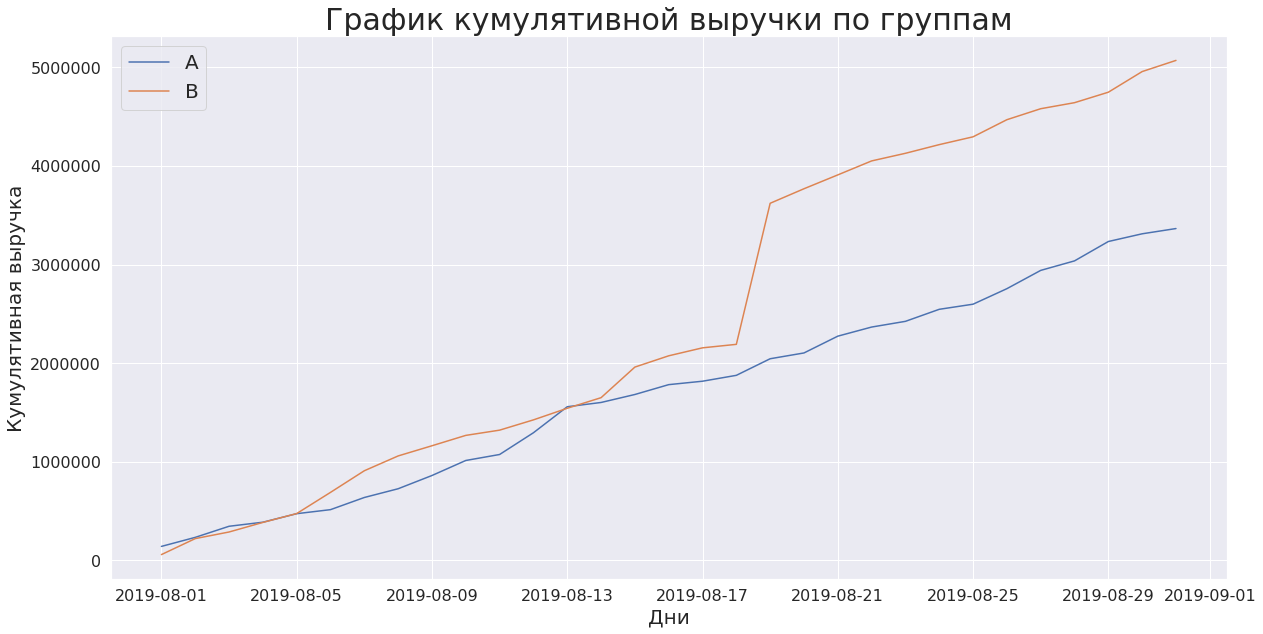

In [43]:
# Установим фон для всех послед. графиков
sns.set(font_scale=0.7)
# Отрисовка графика
plt.figure(figsize =(20,10))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
# Размер легенды
plt.legend(fontsize=20)
# Оформление
graphic('График кумулятивной выручки по группам','Дни','Кумулятивная выручка')

plt.close()

## Вывод
1. Выручка увеличивается в течение всего теста. Так как график кумулятивная выручки, значит заказы были каждый день в обеих группах
2. График выручки группы "В" резко растет где-то в промежуток 18-19 августа. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке
3. Выручка группы "В" выше

## Кумулятивный средний чек по группам<a name="paragraph3.2"></a>
Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.


Посчитаем средний чек по группам — разделим кумулятивную выручку на кумулятивное число заказов, построим график:

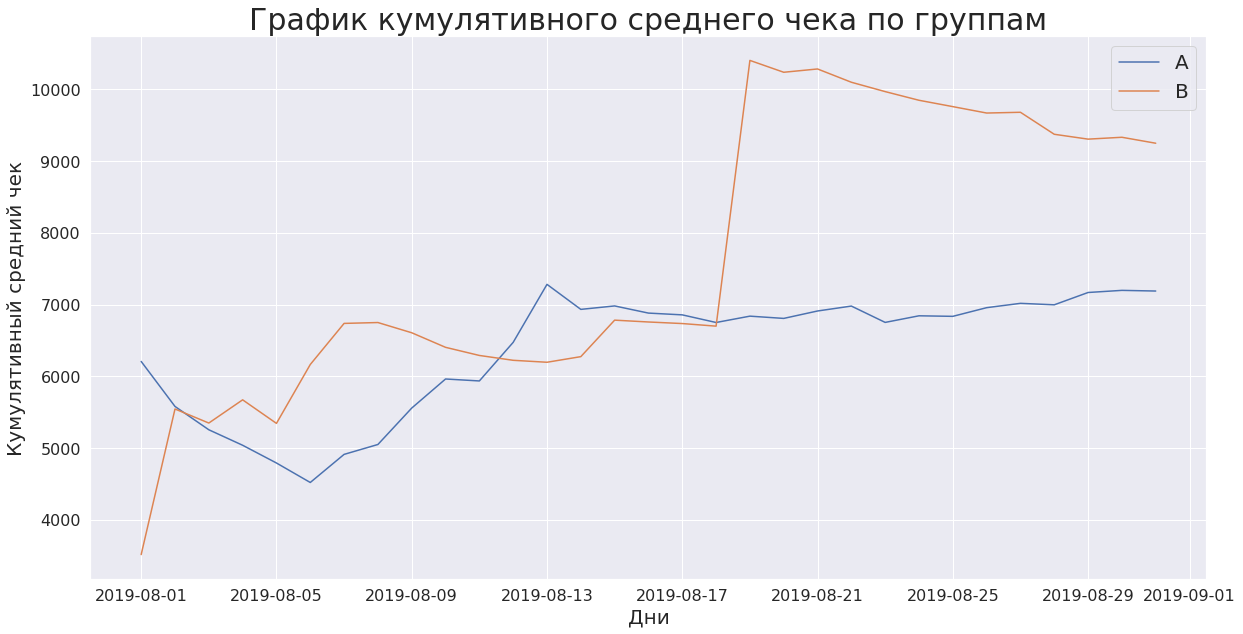

In [44]:
# Отрисовка графика
plt.figure(figsize =(20,10))

# Строим график кумулятивного среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# Строим график кумулятивного среднего чека группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# Размер легенды
plt.legend(fontsize=20)

# Оформление
graphic('График кумулятивного среднего чека по группам','Дни','Кумулятивный средний чек')

plt.close()

Для группы "B" 19 августа - резкий рост показателя, посмотрим, что было в этот день

In [45]:
orders.query('date == "2019-08-19" and group =="B"').sort_values( by='revenue', ascending=False).head(5)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
527,1570513684,2837914161,2019-08-19,33405,B
461,2683113224,154576532,2019-08-19,26550,B
368,3268879337,2536252163,2019-08-19,20026,B
463,4170537404,290022471,2019-08-19,16480,B


## Вывод
1. Средний чек тоже становится равномерным ближе к концу теста:
2. Где-то с 14 августа установился для группы "A", хотя возможен небольшой рост в последние дни теста
3. Для группы "B" 19 августа - резкий рост, затем он и продолжает падать.
4. В группу "B" 19 августа попал крупный заказ (резкий всплеск на графике) = 1294500 у.е..
5. Нужно больше данных, чтобы группе "В" прийти к реальному среднему чеку и установиться на его уровне
6. Предварительно, я бы сделал вывод, что тестирование нужно продолжать

## Относительное изменение кумулятивного среднего чека группы B к группе A<a name="paragraph3.3"></a>
Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения

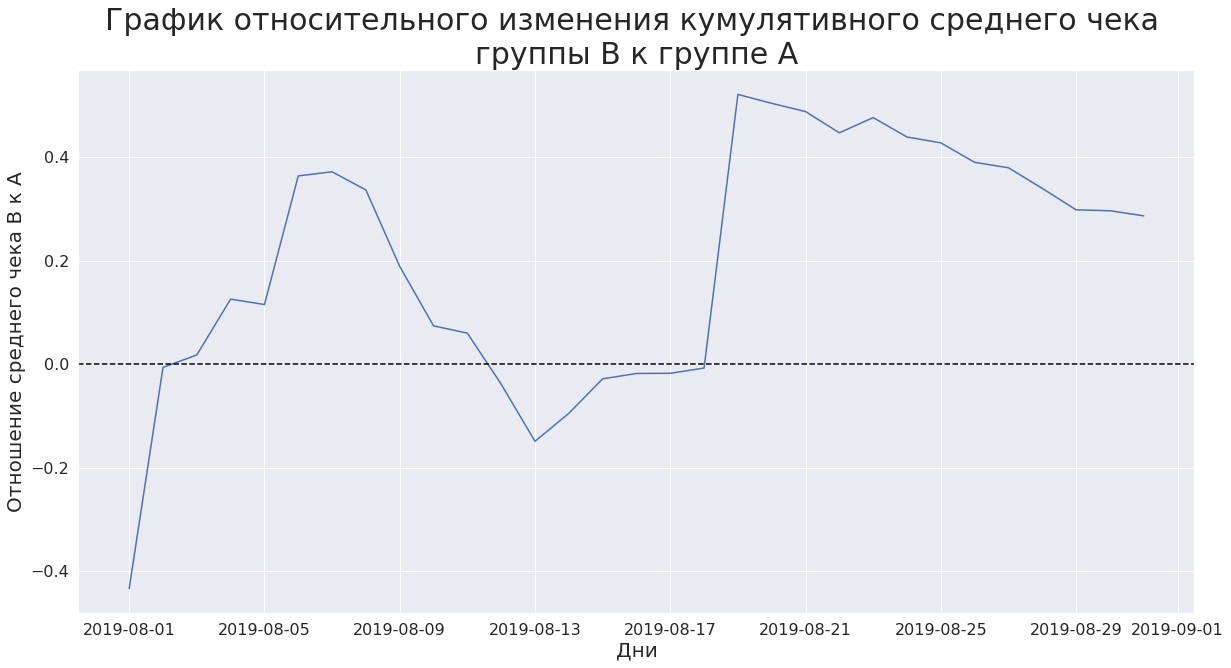

In [46]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])

# Отрисовка графика
plt.figure(figsize =(20,10))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
        
# добавляем ось X (когда средний чек В = среднему чеку А)
plt.axhline(y=0, color='black', linestyle='--') 

# Оформление
graphic('График относительного изменения кумулятивного среднего чека \nгруппы B к группе A',
        'Дни',
        'Отношение среднего чека В к А')

plt.close()

## Вывод
1. В нескольких точках относительного изменения кумулятивного среднего чека резко меняет направление
2. Вероятно в данных "выбросы"

## Кумулятивная конверсия по группам<a name="paragraph3.4"></a>
Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

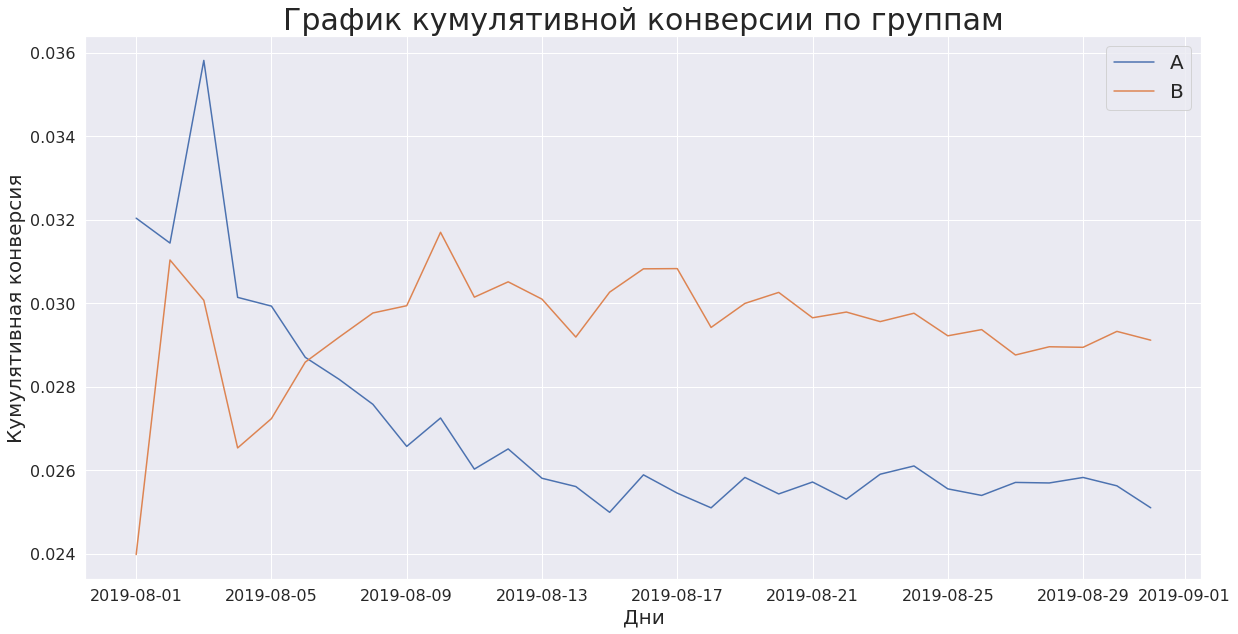

In [47]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Отрисовка графика
plt.figure(figsize =(20,10))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

# Размер легенды
plt.legend(fontsize=20)

# Оформление
graphic('График кумулятивной конверсии по группам',
        'Дни',
        'Кумулятивная конверсия')

plt.close()

Изменим масштаб, чтобы "сгладить" колебания около средних значений

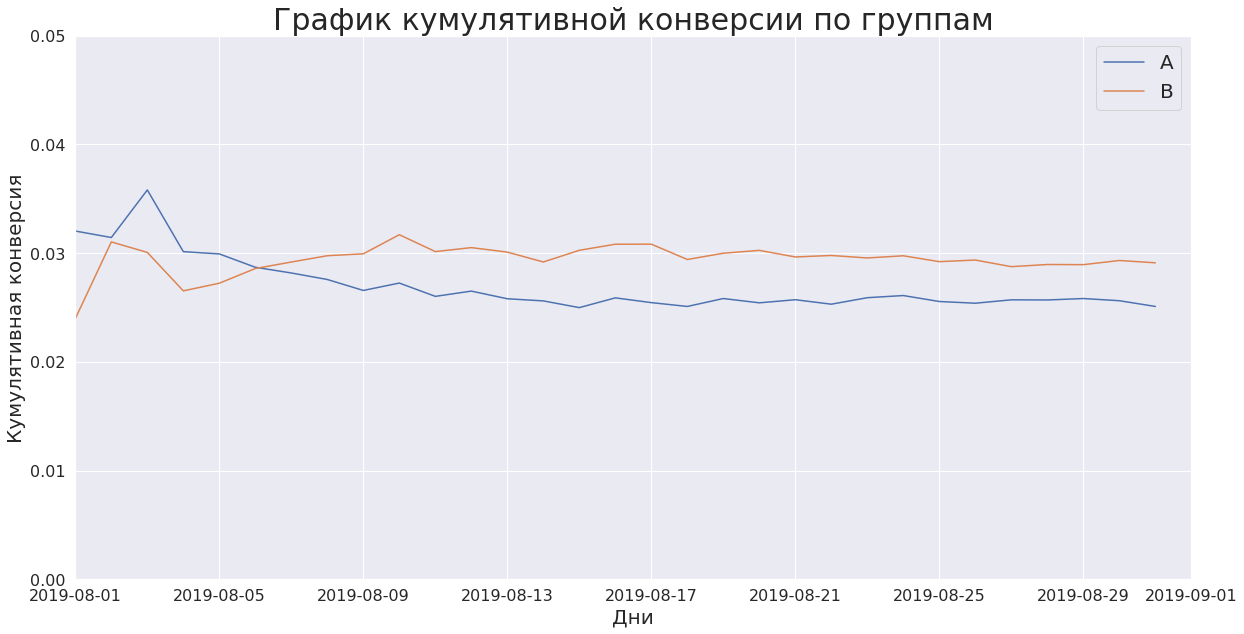

In [48]:
# Отрисовка графика
plt.figure(figsize =(20,10))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')


# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0, 0.050]) 
# Размер легенды
plt.legend(fontsize=20)

# Оформление
graphic('График кумулятивной конверсии по группам',
        'Дни',
        'Кумулятивная конверсия')
plt.close()

## Вывод
1. Группы колебались около одного значения, но где-то с 7 августа  конверсия группы "В" вырвалась вперёд и зафиксировалась, 
2. Конверсия группы "А" просела и также зафиксировалась.


## Относительное изменение кумулятивной конверсии группы B к группе A<a name="paragraph3.5"></a>
Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения

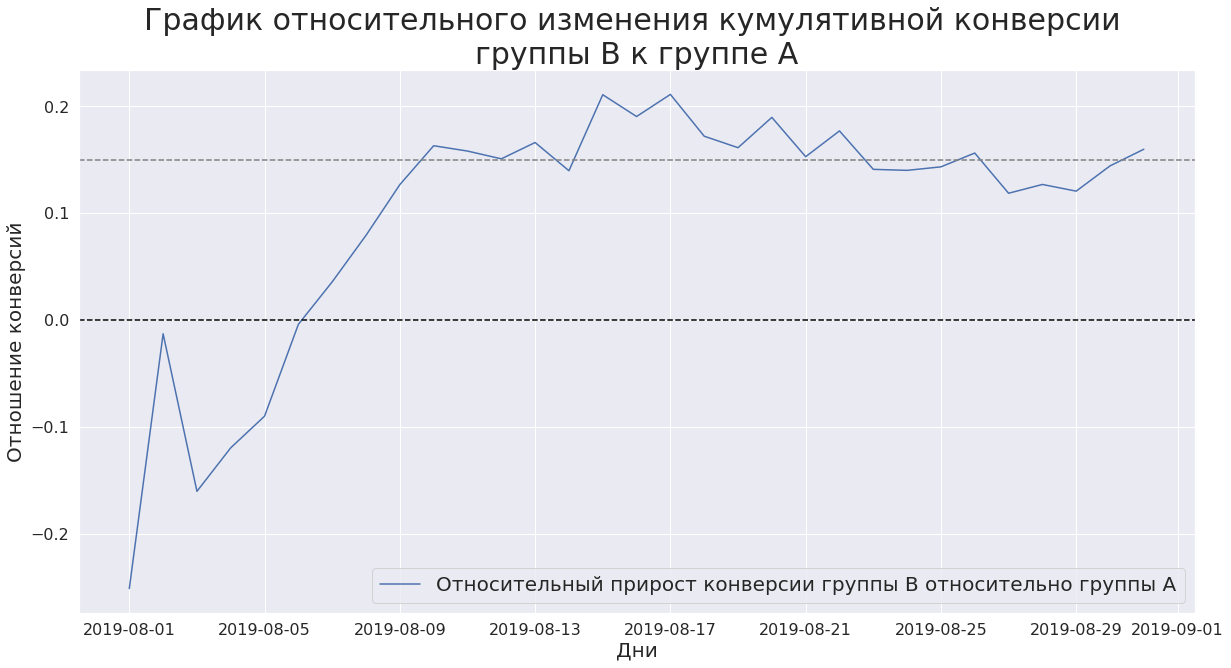

In [49]:
# Объеденим таблицы кумулятивных конверсий А и В
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date',
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])
# Отрисовка графика
plt.figure(figsize =(20,10))
# строим график
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")

# Размер легенды
plt.legend(fontsize=20)
# добавляем ось X (когда кумул. конверсия В = кумул.конверсии А)
plt.axhline(y=0, color='black', linestyle='--')
# добавляем ось (предположительно среднее значение прироста конверсий)
plt.axhline(y=0.15, color='grey', linestyle='--')

# Оформление
graphic('График относительного изменения кумулятивной конверсии \nгруппы B к группе A',
        'Дни',
        'Отношение конверсий')
plt.close()

## Вывод
1. В начале теста группа B  проигрывала группе A, примерно 6-7 августа вырвалась вперёд.
2. До 10-11 наблюдается рост отношения
3. На мой взгляд, можно говорить, что в целом отношение конверсии  установилось, и колеблется около своего среднего значения
4. Необходимо проанализировать аномалии, они могут изменить картину

## Количество заказов по пользователям<a name="paragraph3.6"></a>
Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [50]:
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [51]:
# Оставим только уник. номер заказа и уник. id посетителя
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1)
# посчитаем кол-во заказов для каждого посетителя                 
                 .groupby('visitorId', as_index=False)
                 .agg({'transactionId' : pd.Series.nunique})
)
# Переименуем столбцы
ordersByUsers.columns = ['userId','orders']
# Посмотрим на 10 покупателей с самым большим кол-вом заказов
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Построим точечный график количества заказов по пользователям

In [52]:
print('Количество пользователей:', len(ordersByUsers['orders']))

Количество пользователей: 973


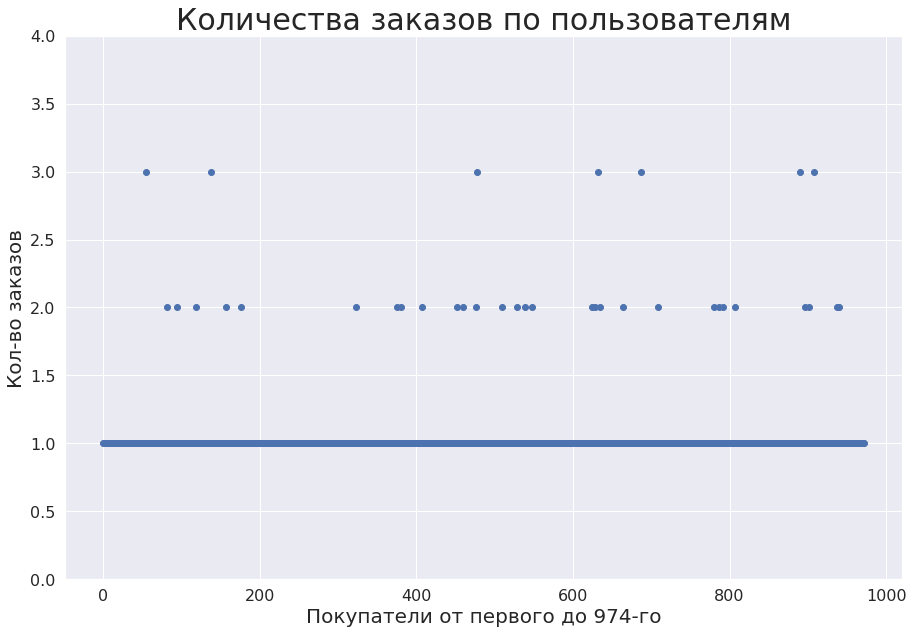

In [53]:
# Значения оси х
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
# Отрисовка графика
plt.figure(figsize=(15,10))
plt.ylim(0,4)
# График
plt.scatter(x_values, ordersByUsers['orders']) 
# Оформление
graphic('Количества заказов по пользователям', 'Покупатели от первого до 974-го', 'Кол-во заказов')
plt.close()




Посмотрим как распределены заказы по группам

In [54]:
# Оставим только уник. номер заказа, группу и уник. id посетителя
ordersByUsers_group = (orders.drop(['revenue', 'date'], axis=1)
# посчитаем кол-во заказов для каждого посетителя по группам                 
                 .groupby(['visitorId','group'], as_index=False)
                 .agg({'transactionId' : pd.Series.nunique})
)
# Переименуем столбцы
ordersByUsers_group.columns = ['userId','group','orders']


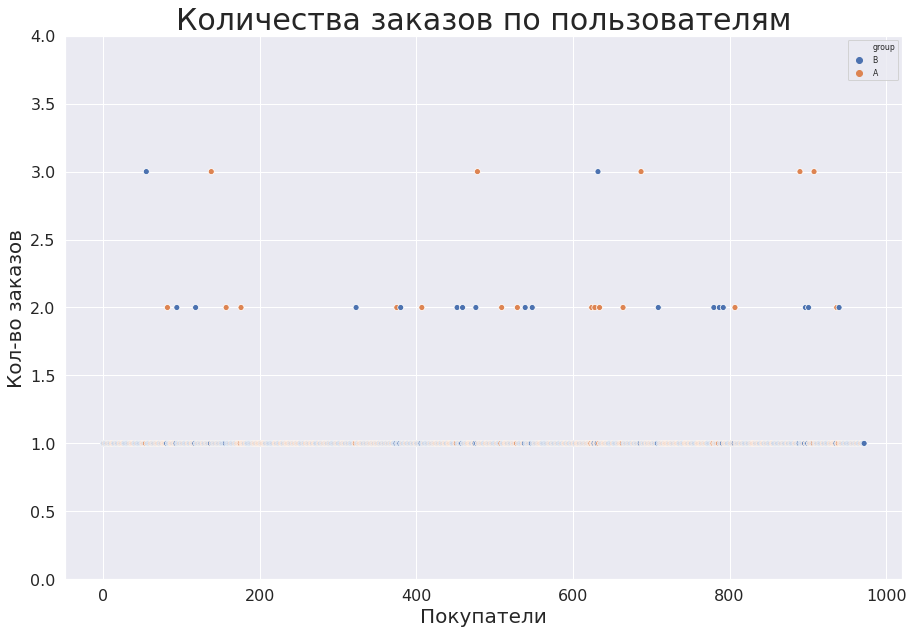

In [55]:
x_values1 = pd.Series(range(0,len(ordersByUsers['orders'])))
# Отрисовка графика
plt.figure(figsize=(15,10))
# Зададим масштаб оси
plt.ylim(0,4)
# График
sns.scatterplot(x = x_values1, y = ordersByUsers_group['orders'], hue = ordersByUsers_group['group'])

graphic('Количества заказов по пользователям', 'Покупатели', 'Кол-во заказов')
plt.close()

График может и не особо «красивый», зато говорит нам, что по кол-ву заказов на человека - группы сильно не отличаются (по крайней мере визуально) 

Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей

In [56]:
print(' 95 % пользователей сделали не больше {} заказов, \n 99 % пользователей сделали не больше {} заказов'
      .format(* np.percentile(ordersByUsers['orders'], [95, 99]))) 

 95 % пользователей сделали не больше 1.0 заказов, 
 99 % пользователей сделали не больше 2.0 заказов


## Вывод
1. На основе визуального анализа графика, можно предварительно заключить, что по кол-ву заказов на человека - группы не отличаются
2. 95 % пользователей сделали не больше одного заказа
3. 99 % пользователей сделали не больше двух заказов
4. Граница аномалий для числа заказов - более двух заказов

## Cтоимости заказов<a name="paragraph3.7"></a>
Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

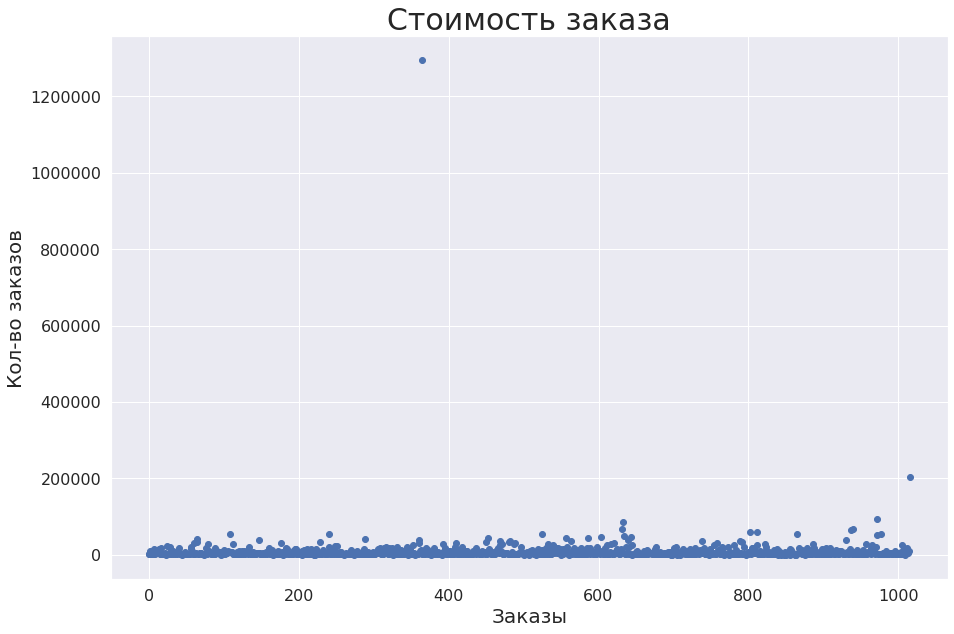

In [57]:
x_values_revenue = pd.Series(range(0,len(orders['revenue'])))
# Отрисовка графика
plt.figure(figsize=(15,10))

# График
plt.scatter(x_values_revenue, orders['revenue']) 
# Оформление
graphic('Стоимость заказа', 'Заказы', 'Кол-во заказов')
plt.close()



Можно заметить выбросы: больше 1 млн., его мы уже видели (за 19 августа), еще один больше 200000 у.е.

Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [58]:
print(' 95 % заказов не дороже {} у.е., \n 99 % заказов не дороже {} у.е.'
      .format(* np.percentile(orders['revenue'], [95, 99]).round())) 

 95 % заказов не дороже 26785.0 у.е., 
 99 % заказов не дороже 53904.0 у.е.


In [59]:
orders['revenue'].describe()

count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

## Вывод
1. В данных есть выбросы (нехарактерные значения)
2. 95 % заказов не дороже 26785.0 у.е., 
3. 99 % заказов не дороже 53904.0 у.е.
4. Граница аномалий по стоимости заказов - дороже 26785 у.е.


(На сколько я понимаю, сто процентной методологии, что считать «выбросом» - нет. Здесь я беру 95 процентиль, из тех соображений, что если результаты тесов не изменяться, когда мы отбросили 5 %, они бы не изменятся и если мы отбросим 1 %. А вот если бы мы получили разную оценку стат. Значимости, то нужно было бы как-нибудь это интерпретировать )

 ## Cтатистическая значимость различий  между группами по «сырым» данным<a name="paragraph4"></a>

Для автоматизации работы, напишем функции, которые выводят результаты стат. тестов 

In [60]:
def shapiro(array1, alpha):

    results = st.shapiro(array1)
    p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value
   
    print('p-значение:', p_value)

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: распределение не нормально")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, всё нормально")  


In [61]:
def mann(array1, array2, alpha):

    results = st.mannwhitneyu(array1, array2)

    print('p-значение: ', results.pvalue)

    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу: разница статистически значима")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя") 

    
    


## Cтатистическая значимость различий в конверсии<a name="paragraph4.1"></a> 
Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

In [62]:
# Кол-во заказов каждого юзера группы А
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
# Кол-во заказов каждого юзера группы В
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [63]:
# Подготовим выборки к тестам, кто ничего не заказал, будут соответствовать нули
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors.query('group=="A"')['visitors'].sum() 
                                                                    - len(ordersByUsersA['orders'])),
                                                                        name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors.query('group=="B"')['visitors'].sum()
                                                                           - len(ordersByUsersB['orders'])), 
                                                                            name='orders')],axis=0)

Проверим распределения выборок на нормальность (критический уровень статистической значимости = 0.05)

In [64]:
shapiro(sampleA, 0.05)

p-значение: 0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [65]:
# критический уровень статистической значимости = 0.05
shapiro(sampleB, 0.05)

p-значение: 0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [66]:
sampleA.unique()

array([1, 2, 3, 0])

p-значение = 0, у нас всего четыре дискретных значения, возможно из-за этого, но распределения явно ненормальные, поэтому посчитаем статистическую значимость различий в конверсии с помощью непараметрического теста Уилкоксона-Манна-Уитни (критический уровень статистической значимости = 0.05)

In [67]:
mann(sampleA, sampleB, 0.05)

p-значение:  0.0054783915417574
Отвергаем нулевую гипотезу: разница статистически значима


Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до двух знаков после запятой и рез-т выведем в процентах

In [68]:
print("Относительный прирост конверсии группы B: {0:.2%}".format(sampleB.mean()/sampleA.mean()-1))

Относительный прирост конверсии группы B: 15.99%


## Вывод
1. Распределения значений конверсий – не являются нормальными  
2. Различия в конверсии между группами по «сырым» данным - статистически значимы
3. Относительный прирост конверсии группы B по отношению к группе А примерно 16%

## Cтатистическая значимость различий в среднем чеке заказа<a name="paragraph4.2"></a> 
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [69]:
# Отберем заказы группы А
checkA = orders[orders['group']=='A']['revenue']
# Отберем заказы группы В
checkB = orders[orders['group']=='B']['revenue']

Построим гистограмму и график плотности распределения стоимости заказа по пользователям групп "А" и "В"

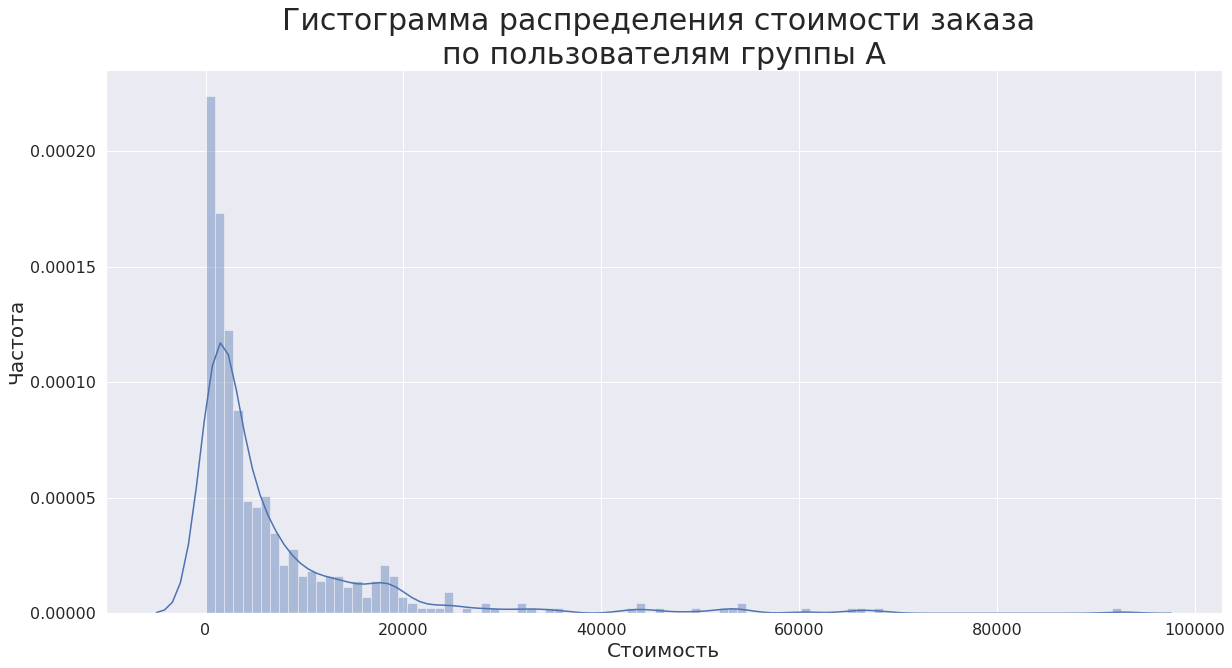

In [70]:
# размер рисунка
plt.figure(figsize=(20,10))
# построим гистограмму (кол-во корзин = 100) и плотность распределения
sns.distplot(checkA,bins=100)

# оформление
graphic('Гистограмма распределения стоимости заказа \nпо пользователям группы А', 'Стоимость', 'Частота')

plt.close()

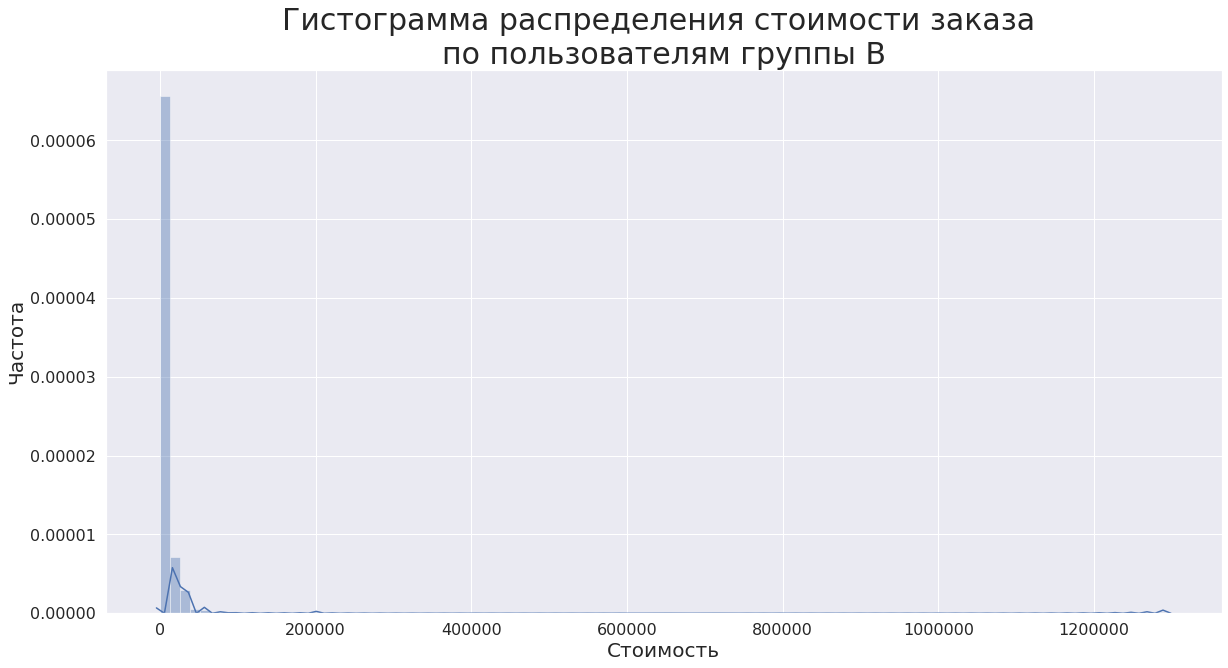

In [71]:
# размер рисунка
plt.figure(figsize=(20,10))
# построим гистограмму (кол-во корзин = 100) и плотность распределения
sns.distplot(checkB,bins=100)

# оформление
graphic('Гистограмма распределения стоимости заказа \nпо пользователям группы B', 'Стоимость', 'Частота')

plt.close()

Визуально - распределения не являются нормальными

Проверим тестом на нормальность

In [72]:
# критический уровень статистической значимости = 0.05
shapiro(checkA, 0.05)

p-значение: 2.8240222045454137e-31
Отвергаем нулевую гипотезу: распределение не нормально


In [73]:
# критический уровень статистической значимости = 0.05
shapiro(checkB, 0.05)

p-значение: 4.203895392974451e-45
Отвергаем нулевую гипотезу: распределение не нормально


Посчитаем статистическую значимость различий в среднем чеке с помощью непараметрического теста Уилкоксона-Манна-Уитни

In [74]:
# критический уровень статистической значимости = 0.01
mann(checkA, checkB, 0.01)

p-значение:  0.41474544990747664
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Т.е. различия в среднем чеке по группам, могли получиться случайно, с вероятностью в 99 %

Тем не менее посчитаем относительный прирост среднего чека группы B

In [75]:
print("Относительный прирост среднего чека группы B: {0:.2%}".format(checkB.mean()/checkA.mean()-1)) 

Относительный прирост среднего чека группы B: 28.66%


## Вывод
1. Хотя относительный прирост среднего чека группы B: 28.66%
2. Такое различие в среднем чеке по группам, могло получиться случайно, с вероятностью в 99 %
3. Причиной могут служить выбросы в данных

 ## Cтатистическая значимость различий  между группами по «очищенным » данным<a name="paragraph5"></a>

99 % пользователей сделали не больше двух заказов - возьмем это значение в качестве порогового, а по стоимости заказов в качестве порога - возьмем 95 процентиль(26785.0 у.е.), так как различия в среднем чеке по группам стат. незначимо, посмотрим изменится ли это, после фильтрации 5 % значений

In [76]:
# Выделим пользователей заказавшими более двух раз 
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
# Выделим пользователей, которые заказали за раз на сумму более   
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
# Конкатенируем таблицы, удалим дубликаты
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates()
# Посмотрим сколько таких пользователей
abnormalUsers.shape[0]

58

### Cтатистическая значимость различий в конверсии<a name="paragraph5.1"></a> 

In [77]:
# Оставим только те данные, которых нет в abnormalUsers, вместо этих значений вставим нули
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                              pd.Series(0, index=np.arange(visitors.query('group=="A"')['visitors'].sum() 
                                                           - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
                              pd.Series(0, index=np.arange(visitors.query('group=="B"')['visitors'].sum() 
                                                           - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

In [78]:
# критический уровень статистической значимости = 0.05
shapiro(sampleAFiltered, 0.05)

p-значение: 0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [79]:
# критический уровень статистической значимости = 0.05
mann(sampleAFiltered, sampleBFiltered, 0.05)

p-значение:  0.0061426368013858595
Отвергаем нулевую гипотезу: разница статистически значима


In [80]:
print("Относительный прирост конверсии группы B: {0:.2%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Относительный прирост конверсии группы B: 18.20%


### Вывод
1. Распределения значений конверсий – не являются нормальными
2. Различия в конверсии между группами по «очищенным » данным - статистически значимы
3. Относительный прирост конверсии группы B по отношению к группе А примерно 18% по «очищенным » данным

### Cтатистическая значимость различий в среднем чеке заказа<a name="paragraph5.2"></a> 

In [81]:
# Отфильтруем заказы
checkAFiltered = (orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']
)

checkBFiltered = (orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']
)

In [82]:
# критический уровень статистической значимости = 0.05
shapiro(checkAFiltered, 0.05)

p-значение: 1.0466450611557513e-22
Отвергаем нулевую гипотезу: распределение не нормально


In [83]:
# критический уровень статистической значимости = 0.01
mann(checkAFiltered, checkBFiltered, 0.01)

p-значение:  0.3229482019045603
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [84]:
print("Относительный прирост среднего чека группы B:{0:.2%}".format(checkBFiltered.mean()/checkAFiltered.mean()-1)) 

Относительный прирост среднего чека группы B:-4.85%


### Вывод 
1. Относительный прирост среднего чека группы B в "очищенных" данных изменился, мы наблюдаем отрицательное значение, т.е. средний чек в группе В уменьшился по сравнению с группой А
2. Различие в среднем чеке по группам, могло получиться случайно, с вероятностью в 99 %, несмотря на отфильтрованные «аномальные» значения 


## Общий вывод <a name="paragraph6"></a> 
1. Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий
2. По сырым данным нет статистически значимого различия по среднему чеку между группами. После удаления аномалий статистически значимого различия также нет
3. График различия конверсии между группами сообщает, что результаты группы B лучше группы A: зафиксировались около среднего значения
4. График различия среднего чека колеблется, после резкого роста 19 августа, метрика имеет тенденцию к снижению
5. Для «сырых» данных наблюдается положительный относительный прирост значения среднего чека группы В, на «очищенных» данных мы наблюдаем падение данного показателя
6. Число аномальных пользователей (по условиям: сделавшие более двух заказов за период или заказ дороже 26785 у.е.) : 58 человек
7. Тест можно считать успешно завершённым, потому что мы получили стат. значимое различие в конверсии (в группе В показатель выше)

